In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

# Import Fashion MNIST
fashion_mnist = fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True)
fashion_mnistx = fashion_mnist = input_data.read_data_sets('input/data', one_hot=True)

#data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Extracting input/data/train-images-idx3-ubyte.gz
Extracting input/data/train-labels-idx1-ubyte.gz
Extracting input/data/t10k-images-idx3-ubyte.gz
Extracting input/data/t10k-labels-idx1-ubyte.gz


In [2]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

'''
Output:
Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)
'''

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


'\nOutput:\nTraining set (images) shape: (55000, 784)\nTraining set (labels) shape: (55000, 10)\nTest set (images) shape: (10000, 784)\nTest set (labels) shape: (10000, 10)\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1))
    return sm


def layers(X, Y):
    """
    :param X:
    :param Y:
    :return:
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y


def initialize_nn(n_x, n_h, n_y):
    """
    :param n_x:
    :param n_h:
    :param n_y:
    :return:
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h)
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2.T)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y)
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost


def back_prop(parameters, cache, X, Y):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']


    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


def update_params(parameters, grads, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


def model_nn(label_dict,X, Y,Y_real,test_x,test_y, n_h, num_iters, alpha, print_cost):
    np.random.seed(3)
    n_x,n_y = layers(X, Y)
    parameters = initialize_nn(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs = []
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
        grads = back_prop(parameters, cache, X, Y)
        if (i > 1500):
            alpha1 = 0.95*alpha
            parameters = update_params(parameters, grads, alpha1)
        else:
            parameters = update_params(parameters, grads, alpha)

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration for %i: %f" % (i, cost))



    predictions = predict_nn(parameters, X)
    print("Train accuracy: {} %", sum(predictions == Y_real) / (float(len(Y_real))) * 100)
    predictions=predict_nn(parameters,test_x)
    print("Train accuracy: {} %", sum(predictions == test_y) / (float(len(test_y))) * 100)



    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return parameters


def predict_nn(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = np.argmax(A2, axis=0)
    return predictions





In [4]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1))
    return sm


def initialize(dim1, dim2):
    """
    :param dim: size of vector w initilazied with zeros
    :return:
    """
    w = np.zeros(shape=(dim1, dim2))
    b = np.zeros(shape=(10, 1))
    return w, b


def propagate(w, b, X, Y):
    """
    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :return:
    """
    m = X.shape[1]  # getting no of rows

    # Forward Prop
    A = softmax((np.dot(w.T, X) + b).T)
    cost = (-1 / m) * np.sum(Y * np.log(A))

    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost


def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    """
    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :param num_iters: number of iterations for gradient
    :param alpha:
    :return:
    """

    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db
        alpha = alpha * 0.99

        # Record the costs
        if i % 50 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 50 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    """
    :param w:
    :param b:
    :param X:
    :return:
    """
    y_pred = np.argmax(softmax((np.dot(w.T, X) + b).T), axis=0)
    return y_pred


def model_LR(label_dict, X_train, Y_train, Y, test_x, test_y, num_iters, alpha, print_cost):
    """
    :param X_train:
    :param Y_train:
    :param X_test:
    :param Y_test:
    :param num_iterations:
    :param learning_rate:
    :param print_cost:
    :return:
    """

    w, b = initialize(X_train.shape[0], Y_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    y_prediction_train = predict(w, b, X_train)
    y_prediction_test = predict(w, b, test_x)
    print("Train accuracy: {} %", sum(y_prediction_train == Y) / (float(len(Y))) * 100)
    print("Test accuracy: {} %", sum(y_prediction_test == test_y) / (float(len(test_y))) * 100)

    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    # Plot learning curve (with costs)
    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(d["learning_rate"]))
    plt.plot()
    plt.show()
    plt.close()

    pri(X_train, y_prediction_train, label_dict)
    return d


def pri(X, Y, label):
    example = X[:, 2]
    print("Prediction for the example is ", label[Y[2]])
    plt.imshow(np.reshape(example, [28, 28]), cmap='Greys')
    plt.plot()
    plt.show()

y = 0 (T-Shirt)
y = 0 (T-Shirt)


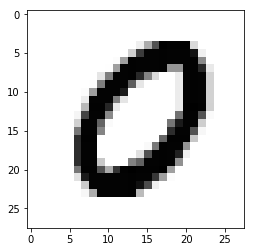

In [5]:
# Create dictionary of target classes
label_dict = {
 0: 'T-Shirt', 
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'
}

# Get 28x28 image
sample_1 = fashion_mnist.train.images[15].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[15] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

# Sample 2

# Get 28x28 image
sample_2 = fashion_mnist.train.images[15].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(fashion_mnist.train.labels[15] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')

y = 0 (T-Shirt)
y = 0 (T-Shirt)


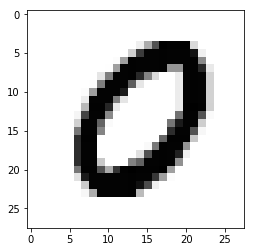

In [6]:
# Sample 1

# Get 28x28 image
sample_1 = fashion_mnist.train.images[15].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[15] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')

# Sample 2

# Get 28x28 image
sample_2 = fashion_mnist.train.images[15].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_2 = np.where(fashion_mnist.train.labels[15] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')

In [7]:
# Network parameters
n_hidden_1 = 128 # Units in first hidden layer
n_hidden_2 = 128 # Units in second hidden layer
n_input = 784 # Fashion MNIST data input (img shape: 28*28)
n_classes = 10 # Fashion MNIST total classes (0–9 digits)
n_samples = fashion_mnist.train.num_examples # Number of examples in training set 


# Create placeholders
def create_placeholders(n_x, n_y):
 '''
 Creates the placeholders for the tensorflow session.
 
 Arguments:
 n_x -- scalar, size of an image vector (28*28 = 784)
 n_y -- scalar, number of classes (10)
 
 Returns:
 X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
 Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
 '''
 
 X = tf.placeholder(tf.float32, [n_x, None], name="X")
 Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
 
 return X, Y

In [8]:
def initialize_parameters():
    '''
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [n_hidden_1, n_input]
                        b1 : [n_hidden_1, 1]
                        W2 : [n_hidden_2, n_hidden_1]
                        b2 : [n_hidden_2, 1]
                        W3 : [n_classes, n_hidden_2]
                        b3 : [n_classes, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    '''
    
    # Set random seed for reproducibility
    tf.set_random_seed(42)
    
    # Initialize weights and biases for each layer
    # First hidden layer
    W1 = tf.get_variable("W1", [n_hidden_1, n_input], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1], initializer=tf.zeros_initializer())
    
    # Second hidden layer
    W2 = tf.get_variable("W2", [n_hidden_2, n_hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b2 = tf.get_variable("b2", [n_hidden_2, 1], initializer=tf.zeros_initializer())
    
    # Output layer
    W3 = tf.get_variable("W3", [n_classes, n_hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b3 = tf.get_variable("b3", [n_classes, 1], initializer=tf.zeros_initializer())
    
    # Store initializations as a dictionary of parameters
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    '''
    Implements the forward propagation for the model: 
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters
    Returns:
    Z3 -- the output of the last LINEAR unit
    '''
    
    # Retrieve parameters from dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Carry out forward propagation      
    Z1 = tf.add(tf.matmul(W1,X), b1)     
    A1 = tf.nn.relu(Z1)                  
    Z2 = tf.add(tf.matmul(W2,A1), b2)    
    A2 = tf.nn.relu(Z2)                  
    Z3 = tf.add(tf.matmul(W3,A2), b3)    
    
    return Z3

In [10]:
def compute_cost(Z3, Y):
    '''
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number_of_examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    '''
    
    # Get logits (predictions) and labels
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    # Compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

In [11]:
def model(train, test, learning_rate=0.0001, num_epochs=16, minibatch_size=32, print_cost=True, graph_filename='costs'):
    '''
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    train -- training set
    test -- test set
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every epoch
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    '''
    
    # Ensure that model can be rerun without overwriting tf variables
    ops.reset_default_graph()
    # For reproducibility
    tf.set_random_seed(42)
    seed = 42
    # Get input and output shapes
    (n_x, m) = train.images.T.shape
    n_y = train.labels.T.shape[0]
    
    costs = []
    
    # Create placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation
    Z3 = forward_propagation(X, parameters)
    # Cost function
    cost = compute_cost(Z3, Y)
    # Backpropagation (using Adam optimizer)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    # Initialize variables
    init = tf.global_variables_initializer()
    
    # Start session to compute Tensorflow graph
    with tf.Session() as sess:
        
        # Run initialization
        sess.run(init)
        
        # Training loop
        for epoch in range(num_epochs):
            
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            
            for i in range(num_minibatches):
                
                # Get next batch of training data and labels
                minibatch_X, minibatch_Y = train.next_batch(minibatch_size)
                
                # Execute optimizer and cost function
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})
                
                # Update epoch cost
                epoch_cost += minibatch_cost / num_minibatches
                
            # Print the cost every epoch
            if print_cost == True:
                print("Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=epoch_cost))
                costs.append(epoch_cost)
        
        # Plot costs
        plt.figure(figsize=(16,5))
        plt.plot(np.squeeze(costs), color='#2A688B')
        plt.xlim(0, num_epochs-1)
        plt.ylabel("cost")
        plt.xlabel("iterations")
        plt.title("learning rate = {rate}".format(rate=learning_rate))
        plt.savefig(graph_filename, dpi=300)
        plt.show()
        
        # Save parameters
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
        
        # Calculate correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # Calculate accuracy on test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: train.images.T, Y: train.labels.T}))
        print ("Test Accuracy:", accuracy.eval({X: test.images.T, Y: test.labels.T}))
        
        return parameters
    
    


1529198017.544296
Cost after epoch 0: 0.301484596836397
Cost after epoch 1: 0.1277713663895029
Cost after epoch 2: 0.0862101811841913
Cost after epoch 3: 0.0652558621759357
Cost after epoch 4: 0.04952377171508533
Cost after epoch 5: 0.03874528120525695
Cost after epoch 6: 0.03016319935434615
Cost after epoch 7: 0.02560288981131601
Cost after epoch 8: 0.02050929712079357
Cost after epoch 9: 0.016946699655180048
Cost after epoch 10: 0.014301544346788592
Cost after epoch 11: 0.011838002270606518
Cost after epoch 12: 0.012870636317349717
Cost after epoch 13: 0.009313473353248076
Cost after epoch 14: 0.009661171658783762
Cost after epoch 15: 0.007517265812008051


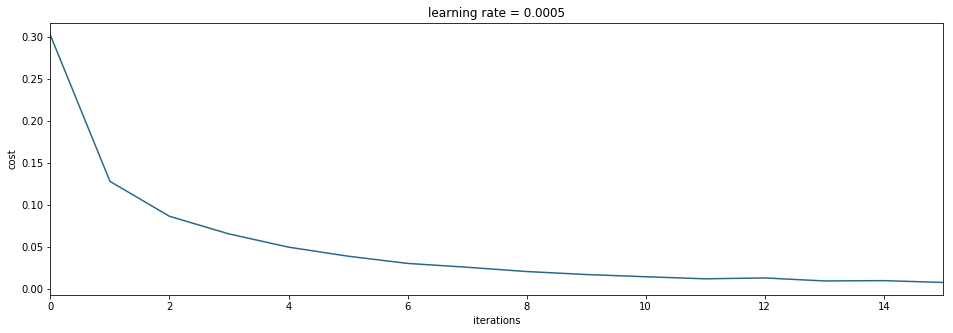

Parameters have been trained!
Train Accuracy: 0.9977818
Test Accuracy: 0.978
00:01:39


In [12]:
import time
start = time.time()
print(start)
train = fashion_mnist.train
test = fashion_mnist.test

parameters = model(train, test, learning_rate=0.0005)

end = time.time()
elapsed_time = end - start
print(time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

In [13]:
# Shapes of test set
datait = fashion_mnist.train.images 
datalt = fashion_mnist.train.labels
datai = fashion_mnist.test.images
datal = fashion_mnist.test.labels


train_x = np.array(fashion_mnist.train.images)
test_x =  np.array(fashion_mnist.test.images)

train_y = np.array(fashion_mnist.train.labels)
test_y =  np.array(fashion_mnist.test.labels)
train_y = train_y.T
train_y = train_y[0]
print(train_y.shape)
Y = train_y
print(Y.shape)   
train_y = (np.arange(np.max(Y)) == Y[:, None]).astype(int)
print(train_y.shape)

print(train_x.shape)
print(test_x.shape)

print(test_y.shape)

(55000,)
(55000,)
(55000, 1)
(55000, 784)
(10000, 784)
(10000, 10)


In [14]:
%%writefile fashion_nn.py 


import numpy as np
import matplotlib.pyplot as plt

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1))
    return sm


def layers(X, Y):
    """
    :param X:
    :param Y:
    :return:
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return n_x, n_y


def initialize_nn(n_x, n_h, n_y):
    """
    :param n_x:
    :param n_h:
    :param n_y:
    :return:
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_y, n_h)
    b2 = np.random.rand(n_y, 1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


def forward_prop(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2.T)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache


def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    logprobs = np.multiply(np.log(A2), Y)
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost


def back_prop(parameters, cache, X, Y):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']


    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.square(A1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


def update_params(parameters, grads, alpha):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters


def model_nn(label_dict,X, Y,Y_real,test_x,test_y, n_h, num_iters, alpha, print_cost):
    np.random.seed(3)
    n_x,n_y = layers(X, Y)
    parameters = initialize_nn(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    costs = []
    for i in range(0, num_iters):

        A2, cache = forward_prop(X, parameters)

        cost = compute_cost(A2, Y, parameters)
        grads = back_prop(parameters, cache, X, Y)
        if (i > 1500):
            alpha1 = 0.95*alpha
            parameters = update_params(parameters, grads, alpha1)
        else:
            parameters = update_params(parameters, grads, alpha)

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print("Cost after iteration for %i: %f" % (i, cost))



    predictions = predict_nn(parameters, X)
    print("Train accuracy: {} %", sum(predictions == Y_real) / (float(len(Y_real))) * 100)
    predictions=predict_nn(parameters,test_x)
    print("Train accuracy: {} %", sum(predictions == test_y) / (float(len(test_y))) * 100)



    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return parameters


def predict_nn(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = np.argmax(A2, axis=0)
    return predictions

Overwriting fashion_nn.py


In [15]:
%%writefile fashion_LR.py 

import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1))
    return sm


def initialize(dim1, dim2):
    """
    :param dim: size of vector w initilazied with zeros
    :return:
    """
    w = np.zeros(shape=(dim1, dim2))
    b = np.zeros(shape=(10, 1))
    return w, b


def propagate(w, b, X, Y):
    """
    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :return:
    """
    m = X.shape[1]  # getting no of rows

    # Forward Prop
    A = softmax((np.dot(w.T, X) + b).T)
    cost = (-1 / m) * np.sum(Y * np.log(A))

    # backwar prop
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    return grads, cost


def optimize(w, b, X, Y, num_iters, alpha, print_cost=False):
    """
    :param w: weights for w
    :param b: bias
    :param X: size of data(no of features, no of examples)
    :param Y: true label
    :param num_iters: number of iterations for gradient
    :param alpha:
    :return:
    """

    costs = []
    for i in range(num_iters):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - alpha * dw
        b = b - alpha * db
        alpha = alpha * 0.99

        # Record the costs
        if i % 50 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 50 == 0:
            print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


def predict(w, b, X):
    """
    :param w:
    :param b:
    :param X:
    :return:
    """
    y_pred = np.argmax(softmax((np.dot(w.T, X) + b).T), axis=0)
    return y_pred


def model_LR(label_dict, X_train, Y_train, Y, test_x, test_y, num_iters, alpha, print_cost):
    """
    :param X_train:
    :param Y_train:
    :param X_test:
    :param Y_test:
    :param num_iterations:
    :param learning_rate:
    :param print_cost:
    :return:
    """

    w, b = initialize(X_train.shape[0], Y_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iters, alpha, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    y_prediction_train = predict(w, b, X_train)
    y_prediction_test = predict(w, b, test_x)
    print("Train accuracy: {} %", sum(y_prediction_train == Y) / (float(len(Y))) * 100)
    print("Test accuracy: {} %", sum(y_prediction_test == test_y) / (float(len(test_y))) * 100)

    d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train": y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": alpha,
         "num_iterations": num_iters}

    # Plot learning curve (with costs)
    costs = np.squeeze(d['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(d["learning_rate"]))
    plt.plot()
    plt.show()
    plt.close()

    pri(X_train, y_prediction_train, label_dict)
    return d


def pri(X, Y, label):
    example = X[:, 2]
    print("Prediction for the example is ", label[Y[2]])
    plt.imshow(np.reshape(example, [28, 28]), cmap='Greys')
    plt.plot()
    plt.show()

Overwriting fashion_LR.py


In [ ]:
%%writefile fashion_DL.py 

import numpy as np
import matplotlib.pyplot as plt


def softmax(z):
    cache = z
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=1))
    return sm, cache


def relu(z):
    """
    :param z:
    :return:
    """
    s = np.maximum(0, z)
    cache = z
    return s, cache


def softmax_backward(dA, cache):
    """
    :param dA:
    :param activation_cache:
    :return:
    """
    z = cache
    z -= np.max(z)
    s = (np.exp(z).T / np.sum(np.exp(z), axis=1))
    dZ = dA * s * (1 - s)
    return dZ


def relu_backward(dA, cache):
    """
    :param dA:
    :param activation_cache:
    :return:
    """
    Z = cache
    dZ = np.array(dA, copy=True)  # just converting dz to a correct object.
    dZ[Z <= 0] = 0
    return dZ


def initialize_parameters_deep(dims):
    """
    :param dims:
    :return:
    """

    np.random.seed(3)
    params = {}
    L = len(dims)

    for l in range(1, L):
        params['W' + str(l)] = np.random.randn(dims[l], dims[l - 1]) * 0.01
        params['b' + str(l)] = np.zeros((dims[l], 1))
    return params


def linear_forward(A, W, b):
    """
    :param A:
    :param W:
    :param b:
    :return:
    """

    Z = np.dot(W, A) + b
    cache = (A, W, b)

    return Z, cache


def linear_activation_forward(A_prev, W, b, activation):
    """
    :param A_prev:
    :param W:
    :param b:
    :param activation:
    :return:
    """
    if activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z.T)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache


def L_model_forward(X, params):
    """
    :param X:
    :param params:
    :return:
    """

    caches = []
    A = X
    L = len(params) // 2  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,
                                             params["W" + str(l)],
                                             params["b" + str(l)],
                                             activation='relu')
        caches.append(cache)

    A_last, cache = linear_activation_forward(A,
                                              params["W" + str(L)],
                                              params["b" + str(L)],
                                              activation='softmax')
    caches.append(cache)
    return A_last, caches


def compute_cost(A_last, Y):
    """
    :param A_last:
    :param Y:
    :return:
    """

    m = Y.shape[1]
    cost = (-1 / m) * np.sum(Y * np.log(A_last))
    cost = np.squeeze(cost)  # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    return cost


def linear_backward(dZ, cache):
    """
    :param dZ:
    :param cache:
    :return:
    """

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1. / m) * np.dot(dZ, cache[0].T)
    db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(cache[1].T, dZ)

    return dA_prev, dW, db


def linear_activation_backward(dA, cache, activation):
    """
    :param dA:
    :param cache:
    :param activation:
    :return:
    """

    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db


def L_model_backward(A_last, Y, caches):
    """
    :param A_last:
    :param Y:
    :param caches:
    :return:
    """

    grads = {}
    L = len(caches)  # the number of layers
    m = A_last.shape[1]
    Y = Y.reshape(A_last.shape)  # after this line, Y is the same shape as A_last

    dA_last = - (np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dA_last,
                                                                                                  current_cache,
                                                                                                  activation="softmax")

    for l in reversed(range(L - 1)):
        current_cache = caches[l]

        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache,
                                                                    activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads


def update_params(params, grads, alpha):
    """
    :param params:
    :param grads:
    :param alpha:
    :return:
    """

    L = len(params) // 2  # number of layers in the neural network

    for l in range(L):
        params["W" + str(l + 1)] = params["W" + str(l + 1)] - alpha * grads["dW" + str(l + 1)]
        params["b" + str(l + 1)] = params["b" + str(l + 1)] - alpha * grads["db" + str(l + 1)]

    return params


def model_DL(label_dict, X, Y, Y_real, test_x, test_y, layers_dims, alpha, num_iterations, print_cost):  # lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    alpha -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    Returns:
    params -- params learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []  # keep track of cost

    params = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):

        A_last, caches = L_model_forward(X, params)
        cost = compute_cost(A_last, Y)
        grads = L_model_backward(A_last, Y, caches)

        if (i > 800 and i<1700):
            alpha1 = 0.80 * alpha
            params = update_params(params, grads, alpha1)
        elif(i>=1700):
            alpha1 = 0.50 * alpha
            params = update_params(params, grads, alpha1)
        else:
            params = update_params(params, grads, alpha)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    predictions = predict(params, X)
    print("Train accuracy: {} %", sum(predictions == Y_real) / (float(len(Y_real))) * 100)
    predictions = predict(params, test_x)
    print("Train accuracy: {} %", sum(predictions == test_y) / (float(len(test_y))) * 100)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()

    return params


def predict(parameters, X):
    A_last, cache = L_model_forward(X, parameters)
    predictions = np.argmax(A_last, axis=0)
    return predictions

Overwriting fashion_DL.py


In [ ]:
import time
import numpy as np
import pandas as pd
import fashion_LR
import fashion_nn
import fashion_DL
start = time.time()
print(start)

def main():
    label_dict = {
        0: 'T - shirt / top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankleboot'
    }

    train_x = np.array(fashion_mnist.train.images)
    test_x =  np.array(fashion_mnist.test.images)

    train_y = np.array(fashion_mnist.train.labels)
    test_y =  np.array(fashion_mnist.test.labels)
    train_y = train_y.T
    train_y = train_y[0]
    print(train_y.shape)
    Y = train_y
    print(Y.shape)   
    train_y = (np.arange(np.max(Y)) == Y[:, None]).astype(int)
    print(train_y.shape)  

    choice = input("1. Logistic Regression \n2. Shallow Network \n3. Deep Network\n")
    if choice == '1':
        d = fashion_LR.model_LR(label_dict, train_x.T, train_y.T, Y, test_x.T, test_y.T[0], num_iters=1500,
                                alpha=0.000005, print_cost=True)
    elif choice == '2':
        d = fashion_nn.model_nn(label_dict, train_x.T, train_y.T, Y, test_x.T, test_y.T[0], n_h=100, num_iters=2300,
                                alpha=0.005, print_cost=True)
    elif choice == '3':
        dims = [784, 300, 100, 50, 10]
        d = fashion_DL.model_DL(label_dict, train_x.T, train_y.T, Y, test_x.T, test_y.T[0], dims, alpha=0.01,
                                num_iterations=2500, print_cost=True)
    else:
        print("Invalid Choice")
end = time.time()
print(start)
print(end)
elapsed_time = end - start
print(time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

main()
end = time.time()
elapsed = end - start
print(elapsed)
elapsed_time = end - start
print(time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))



1529198117.262235
1529198117.262235
1529198117.2627819
00:00:00
(55000,)
(55000,)
(55000, 1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from nolearn.dbn import DBN
import timeit
train = fashion_mnist
features = train.columns[1:]
X = train[features]
y = train['label']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X/255.,y,test_size=0.1,random_state=0)

train_x = np.array(fashion_mnist.train.images)
test_x =  np.array(fashion_mnist.test.images)

train_y = np.array(fashion_mnist.train.labels)
test_y =  np.array(fashion_mnist.test.labels)
train_y = train_y.T
train_y = train_y[0]
print(train_y.shape)
Y = train_y
print(Y.shape)   
train_y = (np.arange(np.max(Y)) == Y[:, None]).astype(int)
print(train_y.shape)  
    
clf_rf = RandomForestClassifier()
clf_rf.fit(train_x,train_y)
y_pred_rf = clf_rf.predict(test_y)
acc_rf = accuracy_score(test_y, y_pred_rf)
print("random forest accuracy: ",acc_rf)

In [ ]:
elapsed_time = end - start
print(time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

In [ ]:
%%writefile mnist_reader.py 
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [ ]:

# Import libraries
from mnist_reader import load_mnist
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout
from keras.layers import Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.initializers import Constant



# Load data
# Function load_minst is available in git.
X_train = np.array(fashion_mnist.train.images)
X_test =  np.array(fashion_mnist.test.images)

y_train = np.array(fashion_mnist.train.labels)
y_test =  np.array(fashion_mnist.test.labels)


# Prepare datasets
# This step contains normalization and reshaping of input.
# For output, it is important to change number to one-hot vector. 
X_train = X_train.astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Create model in Keras
# This model is linear stack of layers
clf = Sequential()
# This layer is used as an entry point into a graph. 
# So, it is important to define input_shape.
clf.add(
    InputLayer(input_shape=(1, 28, 28))
)
# Normalize the activations of the previous layer at each batch.
clf.add(
    BatchNormalization()
)
# Next step is to add convolution layer to model.
clf.add(
    Conv2D(
        32, (2, 2), 
        padding='same', 
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform'
    )
)
# Add max pooling layer for 2D data.
clf.add(MaxPool2D(padding='same'))
# Add this same two layers to model.
clf.add(
    Conv2D(
        32, 
        (2, 2), 
        padding='same', 
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform', 
        input_shape=(1, 28, 28)
    )
)
clf.add(MaxPool2D(padding='same'))
# It is necessary to flatten input data to a vector.
clf.add(Flatten())
# Last step is creation of fully-connected layers.
clf.add(
    Dense(
        128,
        activation='relu',
        bias_initializer=Constant(0.01), 
        kernel_initializer='random_uniform',         
    )
)
# Add output layer, which contains ten numbers.
# Each number represents cloth type.
clf.add(Dense(10, activation='softmax'))
# Last step in Keras is to compile model.
clf.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

print(clf.summary())



In [ ]:
```


```python
clf.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test)
)
```


```python
clf.evaluate(X_test, y_test)

clf.metrics_names

```


